# Explore and clean company listing information

To get started with the construction of a market-value based index, you'll work with the combined listing info for the three largest US stock exchanges, the NYSE, the NASDAQ and the AMEX.

In this and the next exercise, you will calculate market-cap weights for these stocks.

In [31]:
import pandas as pd
# Read Excel file with multiple sheets
file_path = 'dataset/listings.xlsx'
xls = pd.ExcelFile(file_path)

# Create an empty DataFrame to store the combined data
listings = pd.DataFrame()

# Iterate over sheets and append to the DataFrame with a new 'exchange' column
for sheet_name in xls.sheet_names:
    df = xls.parse(sheet_name)
    df['exchange'] = sheet_name
    listings = listings.append(df, ignore_index=True)
listings.head()

c:\Users\88016\anaconda3\envs\env_py\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,exchange
0,XXII,"22nd Century Group, Inc",1.3300,1.206285e+08,NaN,Consumer Non-Durables,Farming/Seeds/Milling,amex
1,FAX,Aberdeen Asia-Pacific Income Fund Inc,5.0000,1.266333e+09,1986.0,NaN,NaN,amex
2,IAF,Aberdeen Australia Equity Fund Inc,6.1500,1.398653e+08,NaN,NaN,NaN,amex
3,CH,"Aberdeen Chile Fund, Inc.",7.2201,6.756346e+07,NaN,NaN,NaN,amex
4,ABE,Aberdeen Emerging Markets Smaller Company Oppo...,13.3600,1.288430e+08,NaN,NaN,NaN,amex


In [32]:
print(listings.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6674 entries, 0 to 6673
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           6674 non-null   object 
 1   Company Name           6674 non-null   object 
 2   Last Sale              6590 non-null   float64
 3   Market Capitalization  6674 non-null   float64
 4   IPO Year               2852 non-null   float64
 5   Sector                 5182 non-null   object 
 6   Industry               5182 non-null   object 
 7   exchange               6674 non-null   object 
dtypes: float64(3), object(5)
memory usage: 417.2+ KB
None


In [33]:
# listings.drop("exchange", axis=1, inplace=True)
# Move 'stock symbol' into the index
listings.set_index('Stock Symbol', inplace = True)

# Drop rows with missing 'sector' data
listings.dropna(subset=['Sector'], inplace=True)

# Select companies with IPO Year before 2019
listings = listings[listings['IPO Year']<2019]

# Inspect the new listings data
print(listings.info())
listings.head()


<class 'pandas.core.frame.DataFrame'>
Index: 2349 entries, ACU to ZTO
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           2349 non-null   object 
 1   Last Sale              2349 non-null   float64
 2   Market Capitalization  2349 non-null   float64
 3   IPO Year               2349 non-null   float64
 4   Sector                 2349 non-null   object 
 5   Industry               2349 non-null   object 
 6   exchange               2349 non-null   object 
dtypes: float64(3), object(4)
memory usage: 146.8+ KB
None


,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,exchange
Stock Symbol,,,,,,,
ACU,Acme United Corporation.,27.3900,9.113899e+07,1988.0,Capital Goods,Industrial Machinery/Components,amex
AAU,"Almaden Minerals, Ltd.",1.7200,1.548917e+08,2015.0,Basic Industries,Precious Metals,amex
USAS,Americas Silver Corporation,3.0500,1.206948e+08,2017.0,Basic Industries,Precious Metals,amex
AINC,Ashford Inc.,57.3373,1.155508e+08,2014.0,Consumer Services,Professional Services,amex
AUXO,"Auxilio, Inc.",6.3043,5.913104e+07,2017.0,Miscellaneous,Business Services,amex


In [34]:
companies_per_sector = listings.groupby('Sector').size().sort_values(ascending=False)
# Show the number of companies per sector
print(companies_per_sector)

Sector
Health Care              445
Consumer Services        402
Technology               386
Finance                  351
Energy                   144
Capital Goods            143
Basic Industries         104
Public Utilities         104
Consumer Non-Durables     89
Miscellaneous             68
Transportation            58
Consumer Durables         55
dtype: int64


# Select and inspect index components

Now that you have imported and cleaned the listings data, you can proceed to select the index components as the largest company for each sector by market capitalization.

You'll also have the opportunity to take a closer look at the components, their last market value, and last price.

In [35]:
x = listings.groupby(['Sector']).head(1)
# print(x)
print("Index:" ,x.index)
print("Columns", x.columns)

Index: Index(['ACU', 'AAU', 'AINC', 'AUXO', 'BPMX', 'ROX', 'CQH', 'IDN', 'MPO', 'SEB',
       'CPRT', 'CHRW'],
      dtype='object', name='Stock Symbol')
Columns Index(['Company Name', 'Last Sale', 'Market Capitalization', 'IPO Year',
       'Sector', 'Industry', 'exchange'],
      dtype='object')


In [36]:
# Select largest company for each sector
components = listings.groupby(['Sector'])['Market Capitalization'].nlargest(1)

# Print components, sorted by market cap
print(components.sort_values(ascending = False))
print(components.index)


Sector                 Stock Symbol
Technology             AAPL            7.400245e+11
Consumer Services      AMZN            4.221385e+11
Miscellaneous          BABA            2.755250e+11
Health Care            AMGN            1.189272e+11
Transportation         UPS             9.018089e+10
Finance                GS              8.884059e+10
Consumer Non-Durables  ABEV            8.824020e+10
Basic Industries       RIO             7.043148e+10
Public Utilities       TEF             5.460981e+10
Capital Goods          GM              5.008634e+10
Energy                 PAA             2.222300e+10
Consumer Durables      CPRT            1.362092e+10
Name: Market Capitalization, dtype: float64
MultiIndex([(     'Basic Industries',  'RIO'),
            (        'Capital Goods',   'GM'),
            (    'Consumer Durables', 'CPRT'),
            ('Consumer Non-Durables', 'ABEV'),
            (    'Consumer Services', 'AMZN'),
            (               'Energy',  'PAA'),
            ( 

In [37]:

# Select stock symbols and print the result
tickers = components.index.get_level_values('Stock Symbol')
print(tickers)


Index(['RIO', 'GM', 'CPRT', 'ABEV', 'AMZN', 'PAA', 'GS', 'AMGN', 'BABA', 'TEF',
       'AAPL', 'UPS'],
      dtype='object', name='Stock Symbol')


In [38]:

# Print company name, market cap, and last price for each component 
info_cols = ['Company Name', 'Market Capitalization', 'Last Sale']
print(listings.loc[tickers,info_cols].sort_values('Market Capitalization',ascending = False))

                                    Company Name  Market Capitalization  \
Stock Symbol                                                              
AAPL                                  Apple Inc.           7.400245e+11   
AMZN                            Amazon.com, Inc.           4.221385e+11   
BABA               Alibaba Group Holding Limited           2.755250e+11   
AMGN                                  Amgen Inc.           1.189272e+11   
UPS                  United Parcel Service, Inc.           9.018089e+10   
GS               Goldman Sachs Group, Inc. (The)           8.884059e+10   
ABEV                                  Ambev S.A.           8.824020e+10   
RIO                                Rio Tinto Plc           7.043148e+10   
TEF                                Telefonica SA           5.460981e+10   
GM                        General Motors Company           5.008634e+10   
PAA           Plains All American Pipeline, L.P.           2.222300e+10   
CPRT                     

# Import index component price information

Now you'll use the stock symbols for the companies you selected in the last exercise to calculate returns for each company.

In [39]:
tickers = list(tickers)

# Print tickers
print(tickers)

# Import prices and inspect result
stock_prices = pd.read_csv('dataset/stock_data.csv', parse_dates=['Date'], index_col='Date')
print(stock_prices.info())





['RIO', 'GM', 'CPRT', 'ABEV', 'AMZN', 'PAA', 'GS', 'AMGN', 'BABA', 'TEF', 'AAPL', 'UPS']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB
None


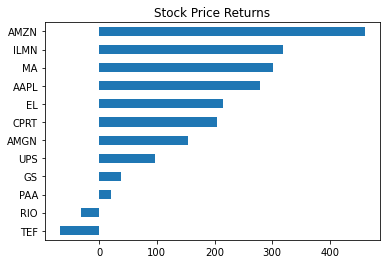

In [40]:
import matplotlib.pyplot as plt
# Calculate the returns (gain from the beginning to the end)
price_return = stock_prices.iloc[-1].div(stock_prices.iloc[0]).sub(1).mul(100)

# Plot horizontal bar chart of sorted price_return  
price_return.sort_values().plot(kind='barh', title = "Stock Price Returns") 
plt.show()

# Calculate number of shares outstanding

The next step towards building a value-weighted index is to calculate the number of shares for each index component.

The number of shares will allow you to calculate the total market capitalization for each component given the historical price series in the next exercise.

In [41]:
# Inspect listings and print tickers
print(listings.info())
print(tickers)


<class 'pandas.core.frame.DataFrame'>
Index: 2349 entries, ACU to ZTO
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           2349 non-null   object 
 1   Last Sale              2349 non-null   float64
 2   Market Capitalization  2349 non-null   float64
 3   IPO Year               2349 non-null   float64
 4   Sector                 2349 non-null   object 
 5   Industry               2349 non-null   object 
 6   exchange               2349 non-null   object 
dtypes: float64(3), object(4)
memory usage: 211.4+ KB
None
['RIO', 'GM', 'CPRT', 'ABEV', 'AMZN', 'PAA', 'GS', 'AMGN', 'BABA', 'TEF', 'AAPL', 'UPS']


In [42]:

# Select components and relevant columns from listings
components = listings.loc[tickers,['Market Capitalization' , 'Last Sale']]

# Print the first rows of components
print(components.head(5))


              Market Capitalization  Last Sale
Stock Symbol                                  
RIO                    7.043148e+10      38.94
GM                     5.008634e+10      33.39
CPRT                   1.362092e+10      29.65
ABEV                   8.824020e+10       5.62
AMZN                   4.221385e+11     884.67


In [43]:

# Calculate the number of shares here
no_shares = components['Market Capitalization'].div(components['Last Sale'])

# Print the sorted no_shares
print(no_shares.sort_values(ascending = False))


Stock Symbol
ABEV    1.570110e+10
AAPL    5.246540e+09
TEF     5.037805e+09
BABA    2.500000e+09
RIO     1.808718e+09
GM      1.500040e+09
UPS     8.692972e+08
AMGN    7.358902e+08
PAA     7.234050e+08
AMZN    4.771706e+08
CPRT    4.593903e+08
GS      3.978174e+08
dtype: float64


# Create time series of market value

You can now use the number of shares to calculate the total market capitalization for each component and trading date from the historical price series.

The result will be the key input to construct the value-weighted stock index, which you will complete in the next exercise.

In [44]:
components['Number of Shares'] = no_shares
# Select the number of shares
no_shares = components['Number of Shares']
print(no_shares.sort_values())


Stock Symbol
GS      3.978174e+08
CPRT    4.593903e+08
AMZN    4.771706e+08
PAA     7.234050e+08
AMGN    7.358902e+08
UPS     8.692972e+08
GM      1.500040e+09
RIO     1.808718e+09
BABA    2.500000e+09
TEF     5.037805e+09
AAPL    5.246540e+09
ABEV    1.570110e+10
Name: Number of Shares, dtype: float64


In [45]:

# Create the series of market cap per ticker
market_cap = stock_prices.mul(no_shares)
market_cap

,AAPL,ABEV,AMGN,AMZN,BABA,CPRT,EL,GM,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,,,,
2010-01-04,1.603867e+11,NaN,4.247558e+10,6.389315e+10,NaN,2.090226e+09,NaN,NaN,6.885424e+10,NaN,NaN,1.953193e+10,1.013425e+11,1.438293e+11,5.057571e+10
2010-01-05,1.607015e+11,NaN,4.210764e+10,6.427011e+10,NaN,2.090226e+09,NaN,NaN,7.007156e+10,NaN,NaN,1.974896e+10,1.029161e+11,1.437286e+11,5.066264e+10
2010-01-06,1.581307e+11,NaN,4.179120e+10,6.310581e+10,NaN,2.081038e+09,NaN,NaN,6.932367e+10,NaN,NaN,1.974172e+10,1.060632e+11,1.422172e+11,5.028884e+10
2010-01-07,1.578159e+11,NaN,4.140854e+10,6.203218e+10,NaN,2.067256e+09,NaN,NaN,7.068022e+10,NaN,NaN,1.950300e+10,1.060813e+11,1.397991e+11,4.990635e+10
2010-01-08,1.588652e+11,NaN,4.177649e+10,6.371182e+10,NaN,2.076444e+09,NaN,NaN,6.934356e+10,NaN,NaN,1.956811e+10,1.072570e+11,1.388923e+11,5.230561e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,6.113268e+11,NaN,1.085806e+11,3.629312e+11,NaN,6.380931e+09,NaN,NaN,9.586207e+10,NaN,NaN,2.416896e+10,6.894833e+10,4.619667e+10,1.008124e+11
2016-12-27,6.152093e+11,NaN,1.091767e+11,3.680894e+11,NaN,6.431464e+09,NaN,NaN,9.609678e+10,NaN,NaN,2.422683e+10,6.936433e+10,4.599516e+10,1.009515e+11
2016-12-28,6.125860e+11,NaN,1.086689e+11,3.684377e+11,NaN,6.380931e+09,NaN,NaN,9.573477e+10,NaN,NaN,2.390854e+10,7.030487e+10,4.549138e+10,1.001430e+11


In [46]:


# Select first and last market cap here
first_value = market_cap.iloc[0]
last_value = market_cap.iloc[-1]
new_df  = pd.concat([first_value,last_value], axis = 1)

new_df


,2010-01-04,2016-12-30
AAPL,1.603867e+11,6.076543e+11
ABEV,NaN,NaN
AMGN,4.247558e+10,1.075945e+11
AMZN,6.389315e+10,3.578159e+11
BABA,NaN,NaN
CPRT,2.090226e+09,6.362556e+09
EL,NaN,NaN
GM,NaN,NaN
GS,6.885424e+10,9.525739e+10
ILMN,NaN,NaN


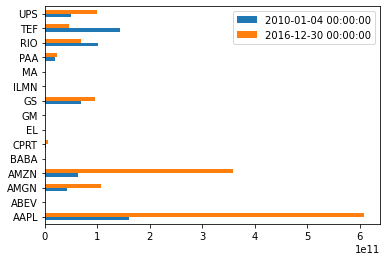

In [47]:
# Concatenate and plot first and last market cap here
new_df.plot(kind="barh")
plt.show()

# Calculate & plot the composite index

By now you have all ingredients that you need to calculate the aggregate stock performance for your group of companies.

Use the time series of market capitalization that you created in the last exercise to aggregate the market value for each period, and then normalize this series to convert it to an index.

In [48]:
market_cap.head()

,AAPL,ABEV,AMGN,AMZN,BABA,CPRT,EL,GM,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,,,,
2010-01-04,1.603867e+11,NaN,4.247558e+10,6.389315e+10,NaN,2.090226e+09,NaN,NaN,6.885424e+10,NaN,NaN,1.953193e+10,1.013425e+11,1.438293e+11,5.057571e+10
2010-01-05,1.607015e+11,NaN,4.210764e+10,6.427011e+10,NaN,2.090226e+09,NaN,NaN,7.007156e+10,NaN,NaN,1.974896e+10,1.029161e+11,1.437286e+11,5.066264e+10
2010-01-06,1.581307e+11,NaN,4.179120e+10,6.310581e+10,NaN,2.081038e+09,NaN,NaN,6.932367e+10,NaN,NaN,1.974172e+10,1.060632e+11,1.422172e+11,5.028884e+10
2010-01-07,1.578159e+11,NaN,4.140854e+10,6.203218e+10,NaN,2.067256e+09,NaN,NaN,7.068022e+10,NaN,NaN,1.950300e+10,1.060813e+11,1.397991e+11,4.990635e+10
2010-01-08,1.588652e+11,NaN,4.177649e+10,6.371182e+10,NaN,2.076444e+09,NaN,NaN,6.934356e+10,NaN,NaN,1.956811e+10,1.072570e+11,1.388923e+11,5.230561e+10


In [49]:
market_cap_series = market_cap

# Aggregate and print the market cap per trading day
raw_index = market_cap_series.sum(axis=1)
print(raw_index)



Date
2010-01-04    6.529794e+11
2010-01-05    6.562973e+11
2010-01-06    6.527435e+11
2010-01-07    6.492939e+11
2010-01-08    6.537965e+11
                  ...     
2016-12-23    1.425208e+12
2016-12-27    1.435541e+12
2016-12-28    1.431656e+12
2016-12-29    1.427209e+12
2016-12-30    1.413611e+12
Length: 1762, dtype: float64


In [50]:

# Normalize the aggregate market cap here 
index = raw_index.div(raw_index.iloc[0]).mul(100)
print(index)


Date
2010-01-04    100.000000
2010-01-05    100.508119
2010-01-06     99.963872
2010-01-07     99.435588
2010-01-08    100.125141
                 ...    
2016-12-23    218.262332
2016-12-27    219.844835
2016-12-28    219.249834
2016-12-29    218.568789
2016-12-30    216.486276
Length: 1762, dtype: float64


# Calculate the contribution of each stock to the index

You have successfully built the value-weighted index. Let's now explore how it performed over the 2010-2016 period.

Let's also determine how much each stock has contributed to the index return.

In [51]:
# Calculate and print the index return here
index_return = (index.iloc[-1]/index.iloc[0]-1) * 100
print(index_return)


116.48627582170703


In [52]:

# Select the market capitalization
market_cap = components['Market Capitalization']

# Calculate the total market cap
total_market_cap = market_cap.sum()

# Calculate the component weights, and print the result
weights = market_cap.div(total_market_cap)
print(weights.sort_values())


Stock Symbol
CPRT    0.006694
PAA     0.010921
GM      0.024614
TEF     0.026837
RIO     0.034613
ABEV    0.043365
GS      0.043660
UPS     0.044318
AMGN    0.058445
BABA    0.135403
AMZN    0.207455
AAPL    0.363675
Name: Market Capitalization, dtype: float64


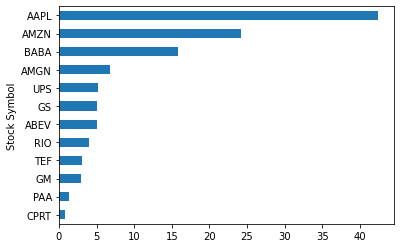

In [53]:

# Calculate and plot the contribution by component
weights.mul(index_return).sort_values().plot(kind="barh")

plt.show()

# Compare index performance against benchmark I

The next step in analyzing the performance of your index is to compare it against a benchmark.

In the video, we used the S&P 500 as benchmark. You can also use the Dow Jones Industrial Average, which contains the 30 largest stocks, and would also be a reasonable benchmark for the largest stocks from all sectors across the three exchanges.

In [54]:
# Convert index series to dataframe here
data = index.to_frame('Index')
data.head()

,Index
Date,
2010-01-04,100.000000
2010-01-05,100.508119
2010-01-06,99.963872
2010-01-07,99.435588
2010-01-08,100.125141


In [55]:
djia = pd.read_csv('dataset/djia.csv', parse_dates=['date'], index_col='date')


# Normalize djia series and add as new column to data
djia = djia.div(djia.iloc[0]).mul(100)
data['DJIA'] = djia

# Show total return for both index and djia
print(data.iloc[-1].div(data.iloc[0]).sub(1).mul(100))


Index    116.486276
DJIA      86.722172
dtype: float64


In [56]:
data.head()

,Index,DJIA
Date,,
2010-01-04,100.000000,78.933999
2010-01-05,100.508119,78.844952
2010-01-06,99.963872,78.857332
2010-01-07,99.435588,79.104785
2010-01-08,100.125141,79.189283


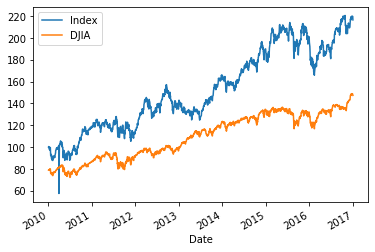

In [57]:

# Plot both series
data.plot()
plt.show()

# Compare index performance against benchmark II

The next step in analyzing the performance of your index is to compare it against a benchmark.

In the video, we have use the S&P 500 as benchmark. You can also use the Dow Jones Industrial Average, which contains the 30 largest stocks, and would also be a reasonable benchmark for the largest stocks from all sectors across the three exchanges.

In [58]:
# Inspect data
print(data.info())
print(data.head(5))


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   1762 non-null   float64
 1   DJIA    1762 non-null   float64
dtypes: float64(2)
memory usage: 41.3 KB
None
                 Index       DJIA
Date                             
2010-01-04  100.000000  78.933999
2010-01-05  100.508119  78.844952
2010-01-06   99.963872  78.857332
2010-01-07   99.435588  79.104785
2010-01-08  100.125141  79.189283


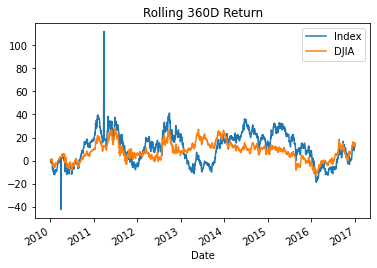

In [59]:
import numpy as np
# Create multi_period_return function here
def multi_period_return(r):
    return (np.prod(r+1)-1) * 100

# Calculate rolling_return_360
rolling_return_360 = data.pct_change().rolling('360D').apply(multi_period_return)

# Plot rolling_return_360 here
rolling_return_360.plot(title = 'Rolling 360D Return')
plt.show()


# Visualize your index constituent correlations

To better understand the characteristics of your index constituents, you can calculate the return correlations.

Use the daily stock prices or your index companies, and show a heatmap of the daily return correlations!

In [60]:
# Inspect stock_prices here
print(stock_prices.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB
None


In [61]:

# Calculate the daily returns
returns = stock_prices.pct_change()

# Calculate and print the pairwise correlations
correlations = returns.corr()
print(correlations)


          AAPL      AMGN      AMZN      CPRT        EL        GS      ILMN  \
AAPL  1.000000  0.286898  0.327611  0.346616  0.306770  0.344981  0.264791   
AMGN  0.286898  1.000000  0.323408  0.355892  0.349893  0.390076  0.336927   
AMZN  0.327611  0.323408  1.000000  0.298929  0.334031  0.333402  0.242726   
CPRT  0.346616  0.355892  0.298929  1.000000  0.371763  0.423160  0.265665   
EL    0.306770  0.349893  0.334031  0.371763  1.000000  0.358318  0.214027   
GS    0.344981  0.390076  0.333402  0.423160  0.358318  1.000000  0.266063   
ILMN  0.264791  0.336927  0.242726  0.265665  0.214027  0.266063  1.000000   
MA    0.391421  0.400230  0.428330  0.401352  0.431556  0.466796  0.301392   
PAA   0.212960  0.229255  0.182438  0.221273  0.206056  0.271982  0.162796   
RIO   0.361684  0.313878  0.326229  0.384944  0.415416  0.527298  0.234445   
TEF   0.325309  0.374555  0.331867  0.376767  0.428925  0.498230  0.231173   
UPS   0.366039  0.432468  0.378399  0.462716  0.456952  0.506407

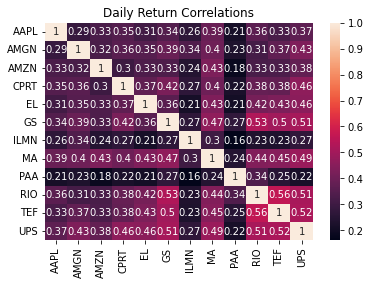

In [62]:
import seaborn as sns
# Plot a heatmap of daily return correlations
sns.heatmap(correlations,annot = True)
plt.title('Daily Return Correlations')
plt.show()

# Save your analysis to multiple excel worksheets

Now that you have completed your analysis, you may want to save all results into a single Excel workbook.

In [63]:
# Inspect index and stock_prices
index = index.to_frame()
print(index.info())
print(stock_prices.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1762 non-null   float64
dtypes: float64(1)
memory usage: 27.5 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB
None


In [64]:

# Join index to stock_prices, and inspect the result
data = stock_prices.join(index)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
 12  0       1762 non-null   float64
dtypes: float64(13)
memory usage: 192.7 KB
None


,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS,0
Date,,,,,,,,,,,,,
2010-01-04,30.57,57.72,133.90,4.55,24.27,173.08,30.55,25.68,27.00,56.03,28.55,58.18,100.000000
2010-01-05,30.63,57.22,134.69,4.55,24.18,176.14,30.35,25.61,27.30,56.90,28.53,58.28,100.508119
2010-01-06,30.14,56.79,132.25,4.53,24.25,174.26,32.22,25.56,27.29,58.64,28.23,57.85,99.963872
2010-01-07,30.08,56.27,130.00,4.50,24.56,177.67,32.77,25.39,26.96,58.65,27.75,57.41,99.435588
2010-01-08,30.28,56.77,133.52,4.52,24.66,174.31,33.15,25.40,27.05,59.30,27.57,60.17,100.125141


In [65]:
# Create index & stock price returns
returns = data.pct_change()

# Export data and data as returns to excel
with pd.ExcelWriter('data.xlsx') as writer:
    data.to_excel(excel_writer= writer,sheet_name='data')
    returns.to_excel(excel_writer= writer,sheet_name='returns')